<a href="https://colab.research.google.com/github/Arooj-khan301/Arooj-Khan/blob/main/Task_2_(DHC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2: **Predict Future Stock Prices (Next Day Closing Price)**

1: The goal is to predict the next day’s closing stock price using historical data.

2: Features such as Open, High, Low, and Volume are used in a regression model.

3: The model predicts prices and compares actual vs predicted values.

In [13]:
                   #Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
#Download Google Stock Data (GOOGL)
data= yf.download("GOOGL", start="2015-01-01", end="2025-09-01")

# Robustly flatten multi-level columns or tuple columns
# This ensures column names are single strings for easier access
new_columns = []
for col in data.columns:
    if isinstance(col, tuple):
        new_columns.append('_'.join(map(str, col)).strip())
    else:
        new_columns.append(str(col).strip()) # Ensure all columns are string and stripped
data.columns = new_columns

# Rename specific columns for easier access, now that they are flattened
data = data.rename(columns={
    'Close_GOOGL': 'Close',
    'Open_GOOGL': 'Open',
    'High_GOOGL': 'High',
    'Low_GOOGL': 'Low',
    'Volume_GOOGL': 'Volume'
})

# Check if data was actually downloaded
if data.empty:
    print("Warning: No data downloaded for GOOGL. Please check ticker and date range.")
else:
    print("Data downloaded successfully. First 5 rows:")
    display(data.head())
    print(f"Data shape: {data.shape}")

/tmp/ipython-input-3565929225.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data= yf.download("GOOGL", start="2015-01-01", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed

Data downloaded successfully. First 5 rows:


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,26.296133,26.606492,26.213203,26.447587,26480000
2015-01-05,25.795090,26.218669,25.710177,26.176956,41182000
2015-01-06,25.158480,25.881988,25.104352,25.846732,54456000
2015-01-07,25.084492,25.399320,25.010007,25.372506,46918000
2015-01-08,25.171890,25.201187,24.581461,24.903739,73054000


Data shape: (2681, 5)


In [ ]:
X= data[['Open','High','Low','Volume']]
Y=data['Target']

In [ ]:
#Train-Test Split (no Shuffle-Time Series)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=False
)


In [16]:
#creating Target
# Ensure 'Close' column exists after potential renaming
if 'Close' in data.columns:
    data['Target'] = data['Close'].shift(-1)
else:
    print("Error: 'Close' column not found in data. Cannot create 'Target'.")
    # Optionally, you might want to stop execution or handle this error differently

data.dropna(inplace=True)

# Check data after creating target and dropping NaNs
if data.empty:
    print("Warning: Data became empty after creating target and dropping NaNs. Check data for missing values or insufficient length.")
else:
    print("Data after creating target and dropping NaNs. First 5 rows:")
    display(data.head())
    print(f"Data shape after cleanup: {data.shape}")

Data after creating target and dropping NaNs. First 5 rows:


,Close,High,Low,Open,Volume,Target
Date,,,,,,
2015-01-02,26.296133,26.606492,26.213203,26.447587,26480000,25.795090
2015-01-05,25.795090,26.218669,25.710177,26.176956,41182000,25.158480
2015-01-06,25.158480,25.881988,25.104352,25.846732,54456000,25.084492
2015-01-07,25.084492,25.399320,25.010007,25.372506,46918000,25.171890
2015-01-08,25.171890,25.201187,24.581461,24.903739,73054000,24.864510


Data shape after cleanup: (2680, 6)


In [18]:
X= data[['Open','High','Low','Volume']]
y=data['Target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [21]:
#Applying Model: Linear Regression Model
model= LinearRegression()
model_name = "Linear Regression"
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#Make Prediction
pred =model.predict(X_test)

In [25]:
#Evaluate (RMSE)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
rmse

np.float64(3.1339231850855405)

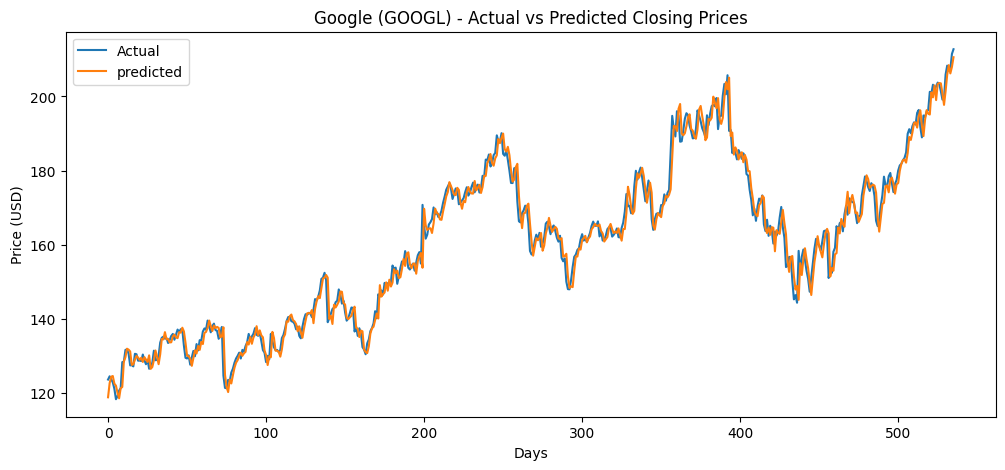

In [28]:
#Plot Actual vs Predicted Closing Price
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(pred, label='predicted')
plt.title("Google (GOOGL) - Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

> The plot shows a comparison between actual and predicted closing prices of Google (GOOGL).

> The predicted line closely follows the actual price trend.

> Small gaps between the lines indicate prediction errors, mainly during sudden price changes.

> Overall, the model shows good performance in predicting next-day closing prices.